# Demo

## Pre-requirements

In [2]:
import importlib
from itertools import cycle, islice
import warnings

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

import core.cnn as cnn

In [3]:
mpl.rcdefaults() 
mpl.rc_file(
    "matplotlibrc",
)

## Scikit-learn datasets

[Source](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html)

In [5]:
# How many points should be generated
np.random.seed(8)
n_samples = 2000

Then we can generate the test sets.

In [6]:
# Toy data set generation
# circles
noisy_circles, _ = datasets.make_circles(
    n_samples=n_samples,
    factor=.5,
    noise=.05
    )

# moons
noisy_moons, _ = datasets.make_moons(
    n_samples=n_samples,
    noise=.05
    )

# blobs
blobs, _ = datasets.make_blobs(
    n_samples=n_samples,
    random_state=8
    )

# None
no_structure = np.random.rand(
    n_samples, 2
    )

# aniso
random_state = 170
X, y = datasets.make_blobs(
    n_samples=n_samples,
    random_state=random_state
    )

transformation = [[0.6, -0.6], [-0.4, 0.8]]
aniso = np.dot(X, transformation)

# varied
varied, _ = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

In [7]:
# Define cluster parameters
dsets = [
    ('circles', noisy_circles, {
        'radius_cutoff': 0.5,
        'cnn_cutoff': 20,
        'member_cutoff': 100,
        'max_clusters': None
        }),
    ('moons', noisy_moons, {
        'radius_cutoff': 0.5,
        'cnn_cutoff': 20,
        'member_cutoff': 1,
        'max_clusters': None
        }),
    ('varied', varied, {
        'radius_cutoff': 0.28,
        'cnn_cutoff': 20,
        'member_cutoff': 20,
        'max_clusters': None
        }),
    ('aniso', aniso, {
        'radius_cutoff': 0.29,
        'cnn_cutoff': 30,
        'member_cutoff': 5,
        'max_clusters': None
         }),
    ('blobs', blobs, {
        'radius_cutoff': 0.4,
        'cnn_cutoff': 20,
        'member_cutoff': 1,
        'max_clusters': None
        }),
    ('None', no_structure, {
        'radius_cutoff': 0.5,
        'cnn_cutoff': 20,
        'member_cutoff': 1,
        'max_clusters': None
        }),
    ]

In [8]:
# Axis property defaults for the following plots
ax_props = {
    "xlabel": None,
    "ylabel": None,
    "xlim": (-2.5, 2.5),
    "ylim": (-2.5, 2.5),
    "xticks": (),
    "yticks": (),
    "aspect": "equal"
}

# Line plot property defaults
line_props = {
    "linewidth": 0,
    "marker": '.',
}

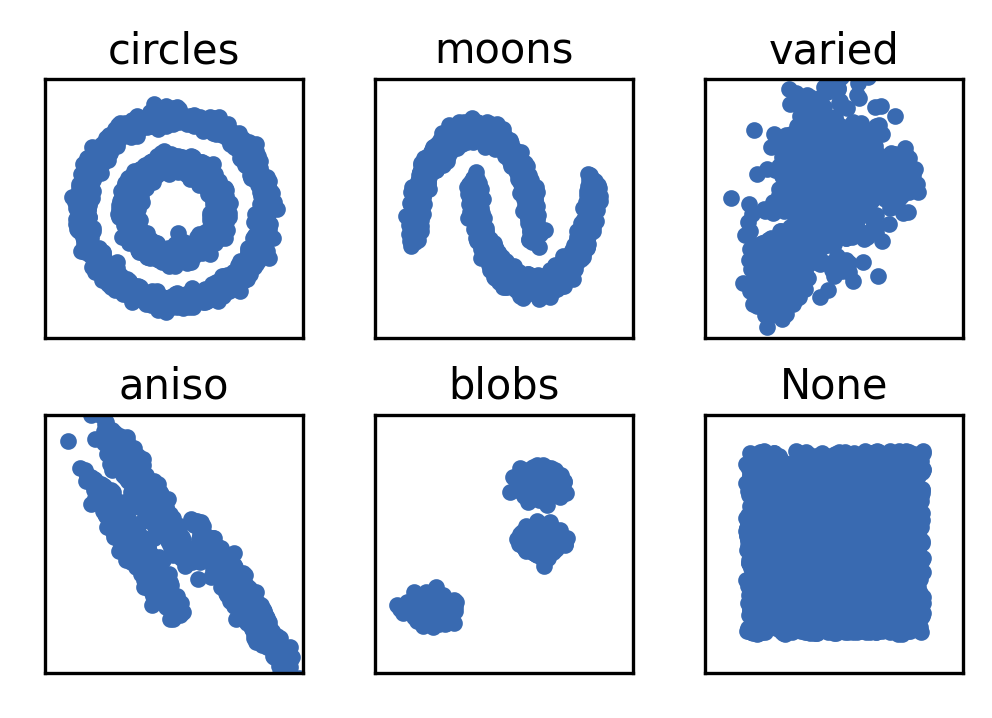

In [9]:
# Plot the original data sets
fig, ax = plt.subplots(2, 3)
Ax = ax.flatten()

for count, (name, data, *_) in enumerate(dsets):
    # Fit all datasets to the same value range
    data = StandardScaler().fit_transform(data)
    # Plot
    Ax[count].plot(data[:, 0], data[:, 1], **line_props)
    Ax[count].set(**ax_props)
    Ax[count].set_title(f'{name}', fontsize=10, pad=4)
    
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, wspace=0.1, hspace=0.3 
    )

TypeError: object of type 'NoneType' has no len()

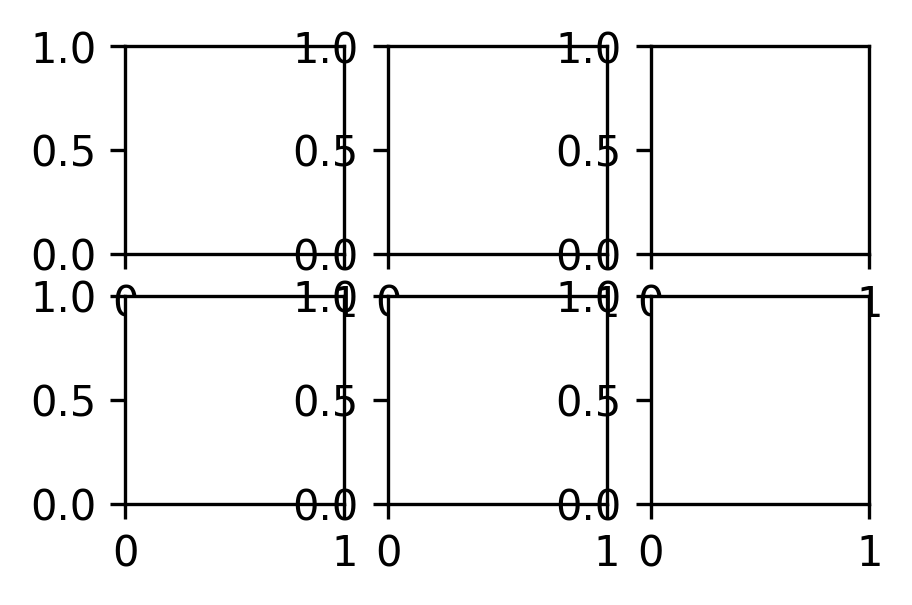

In [62]:
# Cluster the sets and plot the result
fig, ax = plt.subplots(2, 3)
Ax = ax.flatten()

for count, (name, data, params) in enumerate(dsets):
    # Fit all datasets to the same value range
    data = StandardScaler().fit_transform(data)
    
    clustering = cnn.CNN(data=data) 
    clustering.fit(**params)
    
    # Plot
    clustering.evaluate(ax=Ax[count], annotate_pos="random")
    Ax[count].set(**ax_props)
    Ax[count].set_title(f'{name}', fontsize=10, pad=4)
    
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, wspace=0.1, hspace=0.3 
    )

In [101]:
importlib.reload(cnn)

<module 'core.cnn' from '/home/janjoswig/CNN/core/cnn.py'>

In [102]:
clustering = cnn.CNN(data=dsets[0][1])

In [103]:
print(clustering)


core.cnn.CNN cluster object
-------------------------------------------------------------------------------
alias :                         root
hierachy level :                0

data shape :                    Parts      - 1
                                Points     - (2000, (2000,))
                                Dimensions - 2

distance matrix calculated :    False
neighbour list calculated :     False
clustered :                     False
children :                      False



In [93]:
clustering.data.shape

{'parts': 1, 'points': (2000,), 'dimensions': 2}

In [83]:
clustering.dat

(2000, 2)

In [57]:
dsets[0][1]

array([[        nan, -0.31891797],
       [ 0.43470997,  0.15076582],
       [ 0.65700918,  0.66954612],
       ...,
       [-0.61010682,  0.78405413],
       [-0.34633452,  0.39495374],
       [-0.97231461,  0.26975189]])

In [61]:
clustering.data.__str__()

'[[[ 0.3294023  -0.31891797]\n  [ 0.43470997  0.15076582]\n  [ 0.65700918  0.66954612]\n  ...\n  [-0.61010682  0.78405413]\n  [-0.34633452  0.39495374]\n  [-0.97231461  0.26975189]]]'

In [46]:
clustering.dist()

In [47]:
clustering.get_neighbours_from_dist(0.2)

In [30]:
clustering._neighbours.n_neighbours

[127,
 127,
 62,
 64,
 113,
 54,
 105,
 64,
 59,
 124,
 58,
 121,
 64,
 59,
 128,
 67,
 123,
 132,
 124,
 54,
 61,
 61,
 58,
 60,
 123,
 133,
 121,
 61,
 58,
 120,
 123,
 50,
 127,
 121,
 119,
 113,
 51,
 62,
 132,
 114,
 63,
 64,
 62,
 127,
 100,
 62,
 59,
 56,
 91,
 63,
 54,
 121,
 124,
 122,
 125,
 117,
 124,
 93,
 105,
 119,
 62,
 63,
 107,
 55,
 60,
 53,
 64,
 60,
 58,
 55,
 107,
 128,
 122,
 124,
 63,
 58,
 55,
 123,
 107,
 58,
 107,
 59,
 129,
 130,
 119,
 118,
 65,
 61,
 64,
 64,
 53,
 62,
 127,
 55,
 119,
 114,
 70,
 62,
 129,
 125,
 93,
 110,
 118,
 123,
 48,
 59,
 118,
 122,
 63,
 66,
 48,
 124,
 129,
 104,
 64,
 59,
 116,
 65,
 45,
 120,
 60,
 122,
 123,
 123,
 118,
 60,
 120,
 114,
 58,
 57,
 120,
 119,
 56,
 62,
 54,
 58,
 57,
 122,
 124,
 66,
 124,
 55,
 58,
 125,
 117,
 69,
 60,
 62,
 60,
 61,
 120,
 52,
 61,
 126,
 120,
 122,
 60,
 125,
 127,
 66,
 118,
 131,
 59,
 65,
 63,
 60,
 62,
 54,
 57,
 109,
 111,
 114,
 61,
 63,
 59,
 117,
 63,
 123,
 57,
 57,
 61,
 113,
 53,


In [32]:
len(clustering._neighbours.neighbours)

2000

In [38]:
clustering.get_neighbours_lookup(0)

{14,
 24,
 26,
 32,
 35,
 71,
 77,
 99,
 102,
 107,
 116,
 121,
 130,
 155,
 160,
 170,
 177,
 255,
 269,
 270,
 298,
 305,
 313,
 327,
 330,
 335,
 347,
 356,
 382,
 385,
 403,
 448,
 495,
 517,
 552,
 565,
 593,
 630,
 642,
 668,
 679,
 687,
 701,
 702,
 728,
 730,
 740,
 777,
 813,
 828,
 830,
 904,
 910,
 912,
 943,
 957,
 973,
 989,
 1011,
 1022,
 1029,
 1036,
 1040,
 1090,
 1098,
 1107,
 1123,
 1136,
 1141,
 1153,
 1156,
 1157,
 1209,
 1221,
 1251,
 1267,
 1268,
 1274,
 1285,
 1294,
 1295,
 1312,
 1366,
 1380,
 1407,
 1417,
 1419,
 1428,
 1455,
 1476,
 1482,
 1502,
 1503,
 1504,
 1515,
 1516,
 1544,
 1547,
 1560,
 1570,
 1582,
 1583,
 1590,
 1605,
 1620,
 1622,
 1640,
 1650,
 1657,
 1661,
 1709,
 1726,
 1737,
 1751,
 1768,
 1780,
 1787,
 1934,
 1935,
 1951,
 1952,
 1958,
 1961,
 1964,
 1965,
 1980,
 1989}

In [48]:
clustering.fit_generic(
    0.2,
    10,
    None,
    clustering.get_neighbours_lookup
)

In [49]:
clustering.labels

[1,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,


In [122]:
[
added_point
for added_point in clustering._clusterdict[current]
if any(include[self._neighbours.neighbours[added_point]])
]

In [99]:
clustering.shape_str['points'][0]

2000

## Data input

In [88]:
# 2D sequence of sequences
c = cnn.CNN(data=None)
print(c.data.data)
print(c.data.shape)

None
{'parts': None, 'points': None, 'dimensions': None}


In [86]:
# 1D sequence
c = cnn.CNN(data=[1, 2, 3])
print(c.data.data)
print(c.data.shape)

[[1 2 3]]
{'parts': 1, 'points': [1], 'dimensions': 3}


In [87]:
# 2D sequence of sequences
c = cnn.CNN(data=[[1, 2, 3], [4, 5, 6]])
print(c.data.data)
print(c.data.shape)

[[1 2 3]
 [4 5 6]]
{'parts': 1, 'points': [2], 'dimensions': 3}


In [89]:
# Sequence of 2D sequence of sequences
c = cnn.CNN(data=[[[1, 2, 3], [4, 5, 6]],
                  [[7, 8, 9], [10, 11, 12]]])
print(c.data.data)
print(c.data.shape)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
{'parts': 2, 'points': [2, 2], 'dimensions': 3}


## Data output

In [100]:
# Part iterator
list(clustering.data.by_parts())

[array([[        nan, -0.31891797],
        [ 0.43470997,  0.15076582],
        [ 0.65700918,  0.66954612],
        ...,
        [-0.61010682,  0.78405413],
        [-0.34633452,  0.39495374],
        [-0.97231461,  0.26975189]])]